## **PREDICTIVE ANALYTICS USING PYTHON**
#### Predictive Analytics is the type of Data Analaytics where we use the PAST DATA to  make predictions about the future happennings.
#### It is based on HISTORICAL DATA and assumes a static business plan/model.
#### Helps business decisions to be automated using algorithms.
#### Predictive Analytics includes steps:
#### 1.Data Exploration
#### 2.Data cleaning
#### 3.Data visualization
#### 4.Data Modelling and Prediction
#### 5.Performance Analysis(Accuracy Check)
##### I have taken an employee report dataset which has details like employee id,gender, department,total working days, total working hours, yearly bonus,total leaves.Using the fields of the dataset, I will predict the salary of the employee using train-test-split method linear Regression model.

## **DATA EXPLORATION**
#### The first step is to explore the dataset which is to be used for Predictive Analytics.With help of data exploration we can explore the data and find about its shape(total number of rows and columns), total entries,columns & their datatypes and so on.

In [4]:
# importing all the required libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
#Reading data using read_csv  
data=pd.read_csv('/content/emp_report.csv')
data

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,%,NaN,20,13900,402700
1,102,female,sales,160,1280,#,6900,352500
2,103,male,technical,149,1192,51,5160,326940
3,104,female,accounts,158,1264,42,6300,347580
4,105,male,technical,170,1290,30,aa,367200
5,106,male,management,186,%,14,16160,417860
6,107,male,technical,168,1344,32,6150,369030
7,108,male,marketing,171,1368,29,9800,379160
8,109,male,technical,##,1456,18,14620,407720
9,201,female,marketing,187,1496,13,16880,420720


In [6]:
#To display first 5 rows of the dataset
data.head()

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,%,NaN,20,13900,402700
1,102,female,sales,160,1280,#,6900,352500
2,103,male,technical,149,1192,51,5160,326940
3,104,female,accounts,158,1264,42,6300,347580
4,105,male,technical,170,1290,30,aa,367200


In [7]:
#To display last 5 rows of the dataset
data.tail()

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
17,209,male,marketing,166,1328,34,9120,367660
18,301,male,sales,186,1488,14,16120,##
19,302,male,marketing,165,1320,#,8810,365200
20,303,female,technical,189,1512,11,17600,425840
21,304,male,sales,150,1200,50,5260,329200


In [8]:
#to display some basic information about the dataset such as memoray usage, columns and their datatypes,entries etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Emp_id                   22 non-null     int64 
 1   Emp_gender               22 non-null     object
 2   Emp_dept                 22 non-null     object
 3   Emp_total_working_days   22 non-null     object
 4   Emp_total_working_hours  21 non-null     object
 5   Emp_yearly_leaves        22 non-null     object
 6   Emp_year_bonus           22 non-null     object
 7   Emp_salary               22 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.5+ KB


In [9]:
#To display Column names of the dataset.
data.columns

Index(['Emp_id', 'Emp_gender', 'Emp_dept', 'Emp_total_working_days',
       'Emp_total_working_hours', 'Emp_yearly_leaves', 'Emp_year_bonus',
       'Emp_salary'],
      dtype='object')

In [10]:
#Lets see the shape of the dataset that is total  number of rows and columns. 
data.shape

(22, 8)

In [11]:
data.count()

Emp_id                     22
Emp_gender                 22
Emp_dept                   22
Emp_total_working_days     22
Emp_total_working_hours    21
Emp_yearly_leaves          22
Emp_year_bonus             22
Emp_salary                 22
dtype: int64

In [12]:

data["Emp_gender"].value_counts()

male      15
female     7
Name: Emp_gender, dtype: int64

#### The above output tells us that 15 employees are male and 7 employees are female.

In [13]:
data['Emp_dept'].unique()

array(['management', 'sales', 'technical', 'accounts', 'marketing'],
      dtype=object)

#### The above output tells us that there are 5 unique employee departments as management, sales, technical,accounts and marketing.

In [14]:
data["Emp_dept"].value_counts()

technical     7
marketing     4
management    4
sales         4
accounts      3
Name: Emp_dept, dtype: int64

#### The above output tells us that there are 7 employees in technical department, 4 employees each in marketing, sales and management and 3 employees in accounts department.

In [15]:
data['Emp_yearly_leaves'].unique()

array(['20', '#', '51', '42', '30', '14', '32', '29', '18', '13', '12',
       '47', '16', '33', 'aa', '19', '21', '34', '11', '50'], dtype=object)

In [16]:
data['Emp_year_bonus'].unique()

array(['13900', '6900', '5160', '6300', 'aa', '16160', '6150', '9800',
       '14620', '16880', '#', '5580', '15900', '9570', '12800', '14330',
       '13710', '9120', '16120', '8810', '17600', '5260'], dtype=object)

#### In the last two outputs we can see that symbols such as #,aa are included in unique data values of the columns which are inappropraite values.We have to either remove them or replace them by central tendencies. 

In [17]:
#To display the statistical summary of numerical columns we have describe function.
data.describe()
 

,Emp_id
count,22.000000
mean,181.818182
std,74.427105
min,101.000000
25%,106.250000
50%,202.500000
75%,207.750000
max,304.000000


#### In the above output, statistical summary is shown only for Emp_id column whereas it dosen't show that for Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus and Emp_salary.
#### This simply means that these columns have some missing data or inappropraite data which has to be cleaned before moving to prediction.

## **DATA CLEANING**
#### In data exploration, we have explored the data that we will be using for prediction.We have seen that there are some inappropriate values in the data that has to be cleaned.Therefore, we will clean the data before prediction.

In [18]:
#Lets now calculate the null values using isnull function.
data.isnull()

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


#### In the above output NaN values are TRUE whereas symbols like #, ##,%, aa are False. This means that we have to convert these symbols into NaN(Not a number) and then replace or remove them to make sure our data is cleaned and proper for prediction. 

In [19]:
#By taking symbols #, ##,%,aa into a list and replacing them by NaN.
missing_value_list=['#','##','%','aa']
data=pd.read_csv('/content/emp_report.csv',na_values=missing_value_list)
data

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,NaN,NaN,20.0,13900.0,402700.0
1,102,female,sales,160.0,1280.0,NaN,6900.0,352500.0
2,103,male,technical,149.0,1192.0,51.0,5160.0,326940.0
3,104,female,accounts,158.0,1264.0,42.0,6300.0,347580.0
4,105,male,technical,170.0,1290.0,30.0,NaN,367200.0
5,106,male,management,186.0,NaN,14.0,16160.0,417860.0
6,107,male,technical,168.0,1344.0,32.0,6150.0,369030.0
7,108,male,marketing,171.0,1368.0,29.0,9800.0,379160.0
8,109,male,technical,NaN,1456.0,18.0,14620.0,407720.0
9,201,female,marketing,187.0,1496.0,13.0,16880.0,420720.0


In [20]:
#Again check null values using isnull.
data.isnull()

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,False,False,False,True,True,False,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False
5,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False


In [21]:
#Now, Lets check for null values in the columns.
data.isnull().sum()

Emp_id                     0
Emp_gender                 0
Emp_dept                   0
Emp_total_working_days     2
Emp_total_working_hours    3
Emp_yearly_leaves          3
Emp_year_bonus             2
Emp_salary                 2
dtype: int64

#### The above output shows that colmns Emp_total_working_days, Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus and Emp_salary has 2,3,3,2,2 NaN values or improper values each.
#### Before moving to prediction, we have to clean the data and make sure it is proper to make accurate prediction.

In [22]:
data.isnull().sum().sum()
#total number of missing values

12

#### There are total 12 missing values in the dataset.
#### We have to clean the data because these inappropraite values might dsiturb our prediction.

In [23]:
data['Emp_total_working_hours'].isnull().sum()

3

In [24]:
data['Emp_total_working_hours'].median()

1344.0

In [25]:
#replacing missing values of column 'Emp_total_working_hours' with its median value. 
median_value=data['Emp_total_working_hours'].median()
data['Emp_total_working_hours'].fillna(median_value,inplace=True)
data

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,NaN,1344.0,20.0,13900.0,402700.0
1,102,female,sales,160.0,1280.0,NaN,6900.0,352500.0
2,103,male,technical,149.0,1192.0,51.0,5160.0,326940.0
3,104,female,accounts,158.0,1264.0,42.0,6300.0,347580.0
4,105,male,technical,170.0,1290.0,30.0,NaN,367200.0
5,106,male,management,186.0,1344.0,14.0,16160.0,417860.0
6,107,male,technical,168.0,1344.0,32.0,6150.0,369030.0
7,108,male,marketing,171.0,1368.0,29.0,9800.0,379160.0
8,109,male,technical,NaN,1456.0,18.0,14620.0,407720.0
9,201,female,marketing,187.0,1496.0,13.0,16880.0,420720.0


In [26]:
data['Emp_total_working_hours'].isnull().sum()

0

#### All the missing values of Emp_total_working_hours column have been replaced.

In [27]:
data['Emp_total_working_days'].isnull().sum()

2

In [28]:
data['Emp_total_working_hours'].median()

1344.0

In [29]:
#replace missing values of column 'Student_sub1' with its median value. 
median_value=data['Emp_total_working_days'].median()
data['Emp_total_working_days'].fillna(median_value,inplace=True)
data

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,170.5,1344.0,20.0,13900.0,402700.0
1,102,female,sales,160.0,1280.0,NaN,6900.0,352500.0
2,103,male,technical,149.0,1192.0,51.0,5160.0,326940.0
3,104,female,accounts,158.0,1264.0,42.0,6300.0,347580.0
4,105,male,technical,170.0,1290.0,30.0,NaN,367200.0
5,106,male,management,186.0,1344.0,14.0,16160.0,417860.0
6,107,male,technical,168.0,1344.0,32.0,6150.0,369030.0
7,108,male,marketing,171.0,1368.0,29.0,9800.0,379160.0
8,109,male,technical,170.5,1456.0,18.0,14620.0,407720.0
9,201,female,marketing,187.0,1496.0,13.0,16880.0,420720.0


In [30]:
data['Emp_total_working_days'].isnull().sum()

0

#### The above output tells us that all the missing values of Emp_total_working_days column have been replaced. 

In [31]:
data['Emp_yearly_leaves'].isnull().sum()

3

In [32]:
median_value=data['Emp_yearly_leaves'].median()
data['Emp_yearly_leaves'].fillna(median_value,inplace=True)
data

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,170.5,1344.0,20.0,13900.0,402700.0
1,102,female,sales,160.0,1280.0,21.0,6900.0,352500.0
2,103,male,technical,149.0,1192.0,51.0,5160.0,326940.0
3,104,female,accounts,158.0,1264.0,42.0,6300.0,347580.0
4,105,male,technical,170.0,1290.0,30.0,NaN,367200.0
5,106,male,management,186.0,1344.0,14.0,16160.0,417860.0
6,107,male,technical,168.0,1344.0,32.0,6150.0,369030.0
7,108,male,marketing,171.0,1368.0,29.0,9800.0,379160.0
8,109,male,technical,170.5,1456.0,18.0,14620.0,407720.0
9,201,female,marketing,187.0,1496.0,13.0,16880.0,420720.0


In [33]:
data['Emp_year_bonus'].isnull().sum()

2

In [34]:
median_value=data['Emp_year_bonus'].median()
data['Emp_year_bonus'].fillna(median_value,inplace=True)
data

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,170.5,1344.0,20.0,13900.0,402700.0
1,102,female,sales,160.0,1280.0,21.0,6900.0,352500.0
2,103,male,technical,149.0,1192.0,51.0,5160.0,326940.0
3,104,female,accounts,158.0,1264.0,42.0,6300.0,347580.0
4,105,male,technical,170.0,1290.0,30.0,11300.0,367200.0
5,106,male,management,186.0,1344.0,14.0,16160.0,417860.0
6,107,male,technical,168.0,1344.0,32.0,6150.0,369030.0
7,108,male,marketing,171.0,1368.0,29.0,9800.0,379160.0
8,109,male,technical,170.5,1456.0,18.0,14620.0,407720.0
9,201,female,marketing,187.0,1496.0,13.0,16880.0,420720.0


In [35]:
data['Emp_salary'].isnull().sum()

2

In [36]:
data['Emp_salary'].median()

386060.0

In [37]:
median_value=data['Emp_salary'].median()
data['Emp_salary'].fillna(median_value,inplace=True)
data

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
0,101,female,management,170.5,1344.0,20.0,13900.0,402700.0
1,102,female,sales,160.0,1280.0,21.0,6900.0,352500.0
2,103,male,technical,149.0,1192.0,51.0,5160.0,326940.0
3,104,female,accounts,158.0,1264.0,42.0,6300.0,347580.0
4,105,male,technical,170.0,1290.0,30.0,11300.0,367200.0
5,106,male,management,186.0,1344.0,14.0,16160.0,417860.0
6,107,male,technical,168.0,1344.0,32.0,6150.0,369030.0
7,108,male,marketing,171.0,1368.0,29.0,9800.0,379160.0
8,109,male,technical,170.5,1456.0,18.0,14620.0,407720.0
9,201,female,marketing,187.0,1496.0,13.0,16880.0,420720.0


In [38]:
data['Emp_salary'].isnull().sum()

0

#### After replacing missing values in the columns by their respective median, 
 ####  lets now check for total missing values in our dataset.to ensure that there are no missing values missed.

In [39]:
data.isnull().sum()


Emp_id                     0
Emp_gender                 0
Emp_dept                   0
Emp_total_working_days     0
Emp_total_working_hours    0
Emp_yearly_leaves          0
Emp_year_bonus             0
Emp_salary                 0
dtype: int64

#### The above output shows that the data is clean for prediction as there are no missing values in it.

#### Lets check for statistical summary for all the numerical columns.

In [40]:
data.describe()
#describe function after data cleaning.
#all numerical columns are shown below.

,Emp_id,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,181.818182,171.545455,1360.090909,25.863636,11239.545455,382799.545455
std,74.427105,12.529878,97.661178,12.532987,4184.762014,31099.991192
min,101.000000,149.000000,1192.000000,11.000000,5160.000000,326940.000000
25%,106.250000,165.250000,1297.500000,16.500000,7377.500000,365700.000000
50%,202.500000,170.500000,1344.000000,21.000000,11300.000000,386060.000000
75%,207.750000,183.250000,1444.000000,32.750000,14547.500000,407105.000000
max,304.000000,189.000000,1512.000000,51.000000,17600.000000,425840.000000


#### Handling categorical data/column 

In [41]:
dummies=pd.get_dummies(data.Emp_dept)
dummies
#convert categorical into numerical data.

,accounts,management,marketing,sales,technical
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,1
5,0,1,0,0,0
6,0,0,0,0,1
7,0,0,1,0,0
8,0,0,0,0,1
9,0,0,1,0,0


In [42]:
merged= pd.concat([data,dummies],axis='columns')
merged
#merging data, with categorical data converted into numerical.

,Emp_id,Emp_gender,Emp_dept,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary,accounts,management,marketing,sales,technical
0,101,female,management,170.5,1344.0,20.0,13900.0,402700.0,0,1,0,0,0
1,102,female,sales,160.0,1280.0,21.0,6900.0,352500.0,0,0,0,1,0
2,103,male,technical,149.0,1192.0,51.0,5160.0,326940.0,0,0,0,0,1
3,104,female,accounts,158.0,1264.0,42.0,6300.0,347580.0,1,0,0,0,0
4,105,male,technical,170.0,1290.0,30.0,11300.0,367200.0,0,0,0,0,1
5,106,male,management,186.0,1344.0,14.0,16160.0,417860.0,0,1,0,0,0
6,107,male,technical,168.0,1344.0,32.0,6150.0,369030.0,0,0,0,0,1
7,108,male,marketing,171.0,1368.0,29.0,9800.0,379160.0,0,0,1,0,0
8,109,male,technical,170.5,1456.0,18.0,14620.0,407720.0,0,0,0,0,1
9,201,female,marketing,187.0,1496.0,13.0,16880.0,420720.0,0,0,1,0,0


In [43]:
final=merged.drop(['Emp_gender','Emp_dept'],axis='columns')
final
#dropping or removing of categorical columns as we  have already converted them into numerical columns.

,Emp_id,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,Emp_salary,accounts,management,marketing,sales,technical
0,101,170.5,1344.0,20.0,13900.0,402700.0,0,1,0,0,0
1,102,160.0,1280.0,21.0,6900.0,352500.0,0,0,0,1,0
2,103,149.0,1192.0,51.0,5160.0,326940.0,0,0,0,0,1
3,104,158.0,1264.0,42.0,6300.0,347580.0,1,0,0,0,0
4,105,170.0,1290.0,30.0,11300.0,367200.0,0,0,0,0,1
5,106,186.0,1344.0,14.0,16160.0,417860.0,0,1,0,0,0
6,107,168.0,1344.0,32.0,6150.0,369030.0,0,0,0,0,1
7,108,171.0,1368.0,29.0,9800.0,379160.0,0,0,1,0,0
8,109,170.5,1456.0,18.0,14620.0,407720.0,0,0,0,0,1
9,201,187.0,1496.0,13.0,16880.0,420720.0,0,0,1,0,0


## **DATA VISUALIZATION**
#### After data exploration and cleaning, lets visualize the data for better understanding and finding about the relationship between columns.

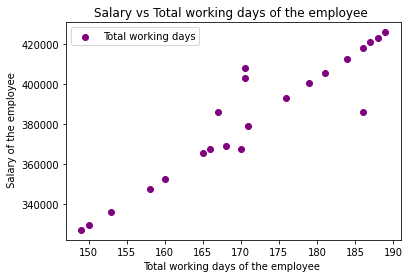

In [44]:
# data visualization 
Empsal=final['Emp_salary']
Empwork=final['Emp_total_working_days']
plt.scatter(Empwork,Empsal,label='Total working days', color='purple')
plt.title('Salary vs Total working days of the employee ')
plt.ylabel(' Salary of the employee')
plt.xlabel('Total working days of the employee ')
plt.legend()
plt.show()

#### The above visualization shows that with increasing number of total working days of the employee, salary of employee also increases. 

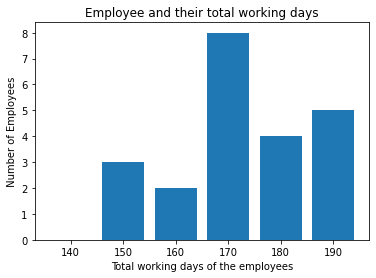

In [45]:
Empwork=final['Emp_total_working_days']
bins=[135,145,155,165,175,185,195]
plt.hist(Empwork,bins,histtype='bar',rwidth=0.8)
plt.xlabel('Total working days of the employees')
plt.ylabel(' Number of Employees ')
plt.title('Employee and their total working days')
plt.show()

#### The above visualization shows that maximum number of employees have worked for around 170 days.

In [46]:
final['Emp_total_working_hours']
#looking at the values/data in Emp_total_working_hours column.

0     1344.0
1     1280.0
2     1192.0
3     1264.0
4     1290.0
5     1344.0
6     1344.0
7     1368.0
8     1456.0
9     1496.0
10    1504.0
11    1224.0
12    1344.0
13    1336.0
14    1408.0
15    1448.0
16    1432.0
17    1328.0
18    1488.0
19    1320.0
20    1512.0
21    1200.0
Name: Emp_total_working_hours, dtype: float64

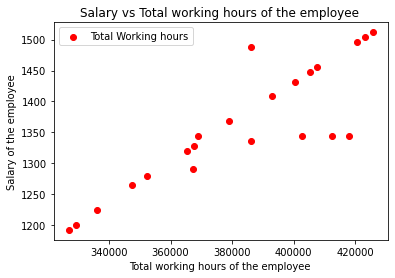

In [47]:
Empsal=final['Emp_salary']
Empwork=final['Emp_total_working_hours']
plt.scatter(Empsal,Empwork,label='Total Working hours', color='red')
plt.title('Salary vs Total working hours of the employee ')
plt.ylabel('Salary of the employee')
plt.xlabel('Total working hours of the employee ')
plt.legend()
plt.show()

#### The above visualization shows that with increasing number of total working hours of the employee, salary of employee also increases. 

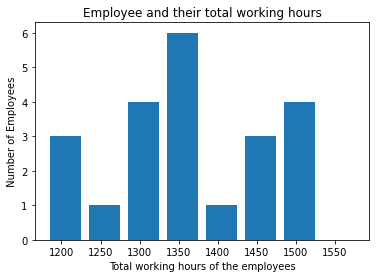

In [48]:
Empwork=final['Emp_total_working_hours']
bins=[1180,1230,1280,1330,1380,1430,1480,1530,1580]
plt.hist(Empwork,bins,histtype='bar',rwidth=0.8)
plt.xlabel('Total working hours of the employees')
plt.ylabel(' Number of Employees ')
plt.title('Employee and their total working hours')
plt.show()

#### The above visualization shows that maximum number of employees have worked for around 1350 hours.

In [49]:
final['Emp_year_bonus']
#looking for data/values in Emp_year_bonus column.

0     13900.0
1      6900.0
2      5160.0
3      6300.0
4     11300.0
5     16160.0
6      6150.0
7      9800.0
8     14620.0
9     16880.0
10    11300.0
11     5580.0
12    15900.0
13     9570.0
14    12800.0
15    14330.0
16    13710.0
17     9120.0
18    16120.0
19     8810.0
20    17600.0
21     5260.0
Name: Emp_year_bonus, dtype: float64

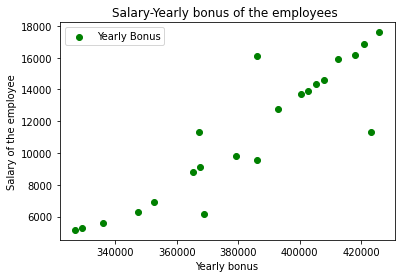

In [50]:
Empsal=final['Emp_salary']
Empbonus=final['Emp_year_bonus']
plt.scatter(Empsal,Empbonus,label='Yearly Bonus', color='green')
plt.title('Salary-Yearly bonus of the employees ')
plt.ylabel('Salary of the employee')
plt.xlabel('Yearly bonus')
plt.legend()
plt.show()

#### The above visualization shows that with increasing yearly bonus of the employee, salary of employee also increases. 

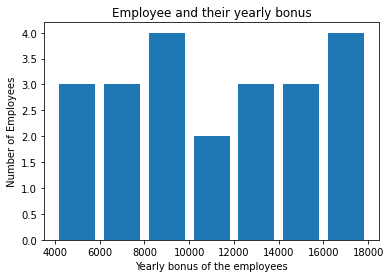

In [51]:
Empwork=final['Emp_year_bonus']
bins=[4000,6000,8000,10000,12000,14000,16000,18000]
plt.hist(Empwork,bins,histtype='bar',rwidth=0.8)
plt.xlabel('Yearly bonus of the employees')
plt.ylabel(' Number of Employees ')
plt.title('Employee and their yearly bonus')
plt.show()

#### The above visualization shows that maximum number of employees have got yearly bonus around 8000 to 10000 and 16000 to 18000.

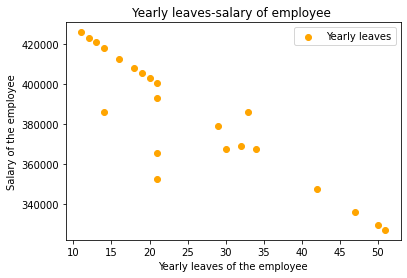

In [52]:
Empsal=final['Emp_salary']
Empleaves=final['Emp_yearly_leaves']
plt.scatter(Empleaves,Empsal,label='Yearly leaves', color='orange')
plt.title('Yearly leaves-salary of employee ')
plt.xlabel('Yearly leaves of the employee')
plt.ylabel('Salary of the employee')
plt.legend()
plt.show()

#### The above visualization shows that with decreasing number of yearly leaves of the employee, salary of employee increases.Which simply means that the employee with less number of leaves have got more salary as compared to teh employee with more number of leaves.

## **DATA MODELLING AND PREDICTION**
#### By using train-test-split method of linear regression model, we have to first split the data into training data and testing data.Since, we are using labelled data, we'll drop the column that is target column.

In [53]:
#train data and mention target column.
train=final.drop(['Emp_salary'], axis=1)
test=final['Emp_salary']

In [54]:
#mentioning train-test ratio  
X_train,X_test,y_train, y_test=train_test_split(train, test, test_size=0.2, random_state=0)

#### Here data is split into training data and testing data by the ratio of 8:2. 

In [55]:
len(X_train) #length of training data

17

In [56]:
X_train #train data

,Emp_id,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,accounts,management,marketing,sales,technical
21,304,150.0,1200.0,50.0,5260.0,0,0,0,1,0
11,203,153.0,1224.0,47.0,5580.0,1,0,0,0,0
19,302,165.0,1320.0,21.0,8810.0,0,0,1,0,0
8,109,170.5,1456.0,18.0,14620.0,0,0,0,0,1
6,107,168.0,1344.0,32.0,6150.0,0,0,0,0,1
16,208,179.0,1432.0,21.0,13710.0,1,0,0,0,0
4,105,170.0,1290.0,30.0,11300.0,0,0,0,0,1
2,103,149.0,1192.0,51.0,5160.0,0,0,0,0,1
5,106,186.0,1344.0,14.0,16160.0,0,1,0,0,0
17,209,166.0,1328.0,34.0,9120.0,0,0,1,0,0


#### The above is the training data which will be used by the model to train it self.

In [57]:
len(X_test)

5

In [58]:
X_test

,Emp_id,Emp_total_working_days,Emp_total_working_hours,Emp_yearly_leaves,Emp_year_bonus,accounts,management,marketing,sales,technical
20,303,189.0,1512.0,11.0,17600.0,0,0,0,0,1
10,202,188.0,1504.0,12.0,11300.0,0,1,0,0,0
14,206,176.0,1408.0,21.0,12800.0,0,0,0,0,1
13,205,167.0,1336.0,33.0,9570.0,0,1,0,0,0
1,102,160.0,1280.0,21.0,6900.0,0,0,0,1,0


#### We will test the model using the data above.

In [59]:
reg=LinearRegression()

#### Now, fit the data into linear regression model.

In [60]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Since, this is linear regression using multiple variables.
#### Employee salary is dependent on total working days, hours, bonus and leaves taken.
#### Mathematically,
#### y=m1*x1+m2*x2+m3*x3+m4*x4+c
#### where y(Emp salary)is dependent on m1(total working days),m2(total working hours),m3(yearly bonus) and m4(yearly leaves).
#### x1,x2,x3 and x4 are coefficients and c is the intercept.
#### Lets check coefficients and intercepts.

In [61]:
reg.coef_

array([-4.14409257e+01,  4.10844844e+02,  5.83912631e+01, -6.44756117e+02,
        2.64493871e+00, -4.51561930e+02,  7.52286699e+03,  4.41187520e+01,
       -6.76908311e+03, -3.46340693e+02])

In [62]:
reg.intercept_

226542.7430284008

###**PREDICTION**
#### Let's check the prediction now

In [63]:
pred=reg.predict(X_test)

In [64]:
pred

array([419035.67109152, 412904.56734991, 392498.49958832, 376227.14822155,
       360732.87589395])

#### The test data was of length 5, we got 5 predictions.
#### Lets compare actual data and predicted data.

In [65]:
# Comparing Actual and  Predicted values.
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
data1

,Actual,Predicted
20,425840.0,419035.671092
10,423180.0,412904.567350
14,392960.0,392498.499588
13,386060.0,376227.148222
1,352500.0,360732.875894


##**PERFORMANCE ANALYSIS OF THE MODEL (ACCURACY CHECK)**
#### Let's check the score of the model.

In [66]:
reg.score(X_train, y_train)

0.9490279794815379

In [67]:
# To calculate mean absolute error.
print('Mean Absolute Error:',metrics .mean_absolute_error(y_test, pred))

Mean Absolute Error: 7121.397928529268


## **CONCLUSION**
### Predictive analytics helps us to find what likely is about to happen by using the past data.
#### Predictive Analytics is performed on employee report dataset which includes steps as:
#### 1.Data exploration-where we explore the data that is being used for predictive anayltics.It gives us fair idea about the shape,basic information,unique columns & their datatypes etc.
#### 2.Data cleaning-Before moving to data modelling or prediction, it is important to ensure that the data has no missing or inappropriate values whcih may affect the prediction.If there are any missing or inappropriate values, they have to be removed or replaced.
#### 3.Data visualization-For better understanding of the data being used, visualization helps us to understand the relationship between columns and many more.
#### 4.Data modelling or Prediction-once the data is cleaned, we can move forward with data modelling and then prediction.
#### I have used train-test-split method of linear regression model where data was split into training data and testing data in the ratio of 8:2.
#### 5.Performance analysis (Accuracy check)-once the predictions are made, the efficiency of model is to be checked by score of the model.
#### Other techniques apart from linear regression can be used are time series analysis, data mining etc.
